## Background knowlegde

Have you ever wonder does it makes sense to check the correlation of two variables that have binary values (either 0 or 1) with Pearson correlation coefficient? 

The purpose of this notebook is for checking the question above. In general, I will compare the Pearson and Matthews correlation coefficients with variables that have binary values. 

If both the Pearson and Matthews correlation coefficients are the same, the result indicates that we are safe to use Pearson correlation coefficient for two variables that have binary values.

The brief introduction of Pearson and Matthews correlation coefficients are shown below:

- **Pearson correlation coefficient:** A measure of the strength and direction of a **linear relationship** between two variables.

- **Matthews correlation coefficient**: A measure of the quality of binary classifications. A coefficient of +1 represents a perfect prediction, 0 an average random prediction and -1 an inverse prediction. The statistic is also known as the phi coefficient.

In [1]:
import numpy as np
from scipy import stats
from sklearn.metrics import matthews_corrcoef
import matplotlib.pyplot as plt

In [2]:
def cc_interval(x, y, thresh=0.05):
    
    """Confidence Interval for Correlation"""

    # Correlation
    cc = getcc(x, y)

    # Transformation
    zc = np.arctanh(cc)

    # Std. Error
    cc_se = 1 / np.sqrt(len(x) - 3)

    # Confidence Interval for Correlation Coefficient
    c_quantile = stats.norm.ppf(1 - thresh/2)
    c_min = np.tanh(zc - cc_se*c_quantile)
    c_max = np.tanh(zc + cc_se*c_quantile)

    return cc, c_min, c_max


def getcc(x, y): # Correlation
    return np.corrcoef(x, y)[0, 1]


def boot(true, pred, N, metric, alpha=0.05, seed=0):
    
    # Estimate Interval for 'metric' via bootstrapping, N times
    # true, pred, np arrays

    m = len(true)
    np.random.seed(seed)

    testdata = []
    for _ in range(N):
        _samp = np.random.randint(0, m, m)
        testdata.append(metric(true[_samp], pred[_samp]))

    return np.quantile(testdata, [alpha/2, 1-alpha/2])

## Test correlation coefficient with numerical data

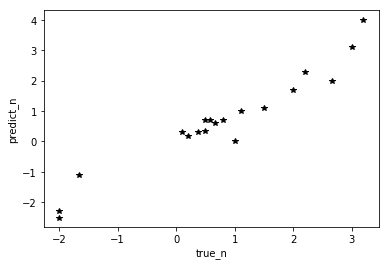

In [3]:
# Numeric data
true_n = np.array([.38, .58, 1.1, 2.2, -2, .1, 1, 2, -2, 1.5, .5, 3, .66, .2, .8, 0.5, 3.2, 2.67, -1.66])
predict_n = np.array([.32, .70, 1.0, 2.3, -2.5, .3, 0, 1.7, -2.3, 1.1, .7, 3.1, .61, .19, .7, 0.33, 4, 2.0, -1.11])

plt.plot(true_n, predict_n, 'k*')
plt.xlabel('true_n')
plt.ylabel('predict_n')
plt.show()

In [8]:
print('Pearson correlation of population: ', getcc(true_n, predict_n))
print('Confidence interval for correlation', cc_interval(true_n, predict_n)[1:])
print('Estimated confidence interval for correlation via boostrapping: ', boot(true_n, predict_n, 1000, getcc))

Pearson correlation of population:  0.9667469906367849
Confidence interval for correlation (0.9137862260507624, 0.9873885658801209)
Estimated confidence interval for correlation via boostrapping:  [0.92580913 0.98938257]


## Test correlation coefficient with binary data

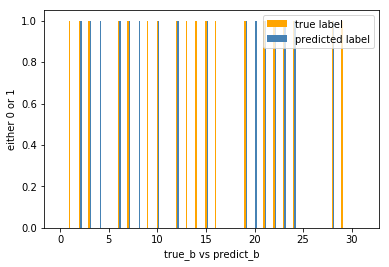

In [9]:
# Binary
true_b = np.array([0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0])
predict_b = np.array([0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0])

N = len(true_b)
ind = np.arange(N)
width = 0.15
plt.bar(ind, true_b, width, color='orange', label='true label')
plt.bar(ind+width, predict_b, width, color='steelblue', label='predicted label')
plt.xlabel('true_b vs predict_b')
plt.ylabel('either 0 or 1')
plt.legend()
plt.show()

In [10]:
print('Pearson correlation of population: ', getcc(true_b, predict_b))
print('Confidence interval for correlation', cc_interval(true_b, predict_b)[1:])
print('Estimated confidence interval for correlation via boostrapping: ', 
      boot(true_b, predict_b, 1000, getcc))

Pearson correlation of population:  0.4453993340830444
Confidence interval for correlation (0.11448595593711355, 0.6873433417845648)
Estimated confidence interval for correlation via boostrapping:  [0.11555252 0.73352227]


In [14]:
print('Phi correlation of population: ', matthews_corrcoef(true_b, predict_b))
print('Confidence interval for correlation', cc_interval(true_b, predict_b)[1:])
print('Estimated confidence interval for correlation via boostrapping: ', 
      boot(true_b, predict_b, 1000, matthews_corrcoef))

Phi correlation of population:  0.44539933408304444
Confidence interval for correlation (0.11448595593711355, 0.6873433417845648)
Estimated confidence interval for correlation via boostrapping:  [0.11555252 0.73352227]


## Conclusion

Both Pearson and Matthews (Phi) correlation coefficients give the same result. Hence, it is safe for us to test the correlation between two binary variables with Pearson correlation coefficient.

---